<a href="https://colab.research.google.com/github/saurabbh14/TDSE_1D/blob/main/Split_Oerator_method_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install imagemagick

# **Split Operator method**

This code is the basic implemetation of Spilt operator method in one dimetion. The code is written in atomic units i.e. $m_e = ℏ = a_0 =1$. The sample code depicts the motion of Gaussian-type electron wavefunction in the harmonic potential. Also the average mass of proton and neutron is $m_p \approx 1837 m_e$ 

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Define the potential function
V = lambda x: 0.5*x**2 

# Define the initial wave function
psi = lambda x: np.exp(-10*(x-2)**2/2)

# mass
mu = 1 

# Define the time step and number of steps
dt = 0.1
Nt = 20000

# Define the spatial discretization
L = 10
N_points = 2**10
dx = 2*L/N_points
x = np.linspace(-L, L, N_points)

# visualizing the potential
plt.plot(x, V(x))
plt.show()

# Compute the kinetic energy operator
K = np.fft.fftfreq(N_points, d=dx)**2 /(2*mu)

# Initial wavefunction
psi_x = np.complex128(psi(x))   # genarating comlex array
psi_x /= np.sqrt(sum(abs(psi_x)**2)*dx) # Normalization

#initialize an empty list to store the wave function at each time step
psi_list = []
psi_list.append(psi_x) #append the initial wave function to the list
  
# Split operator function
def split_operator_fft(psi_x, dt):
   psi_x *= np.exp(-1j*V(x)*dt/2)          # V : dt/2
   psi_k = np.fft.fft(psi_x)      # FFT
   psi_k *= np.exp(-1j*K*dt)               # K : dt
   psi_x = np.fft.ifft(psi_k)  # inverse FFT
   psi_x *= np.exp(-1j*V(x)*dt/2)          # V : dt/2 
   return psi_x

# begin timeloop
for i in range(Nt):
   psi_x = split_operator_fft(psi_x, dt)
   psi_list.append(psi_x) #append the current wave function to the list
 
#End of  the timeloop

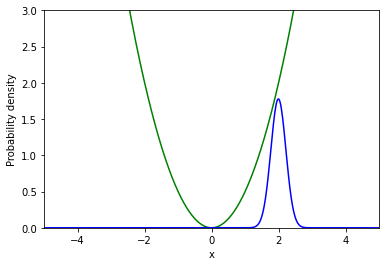

In [16]:
# Generating animation
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = plt.axes(xlim=(-5, 5), ylim=(0, 3))
ax.plot(x,V(x), "g-")  # plotting the potential
line, = ax.plot([], [], "b-")

def init():
    line.set_data([], [])
    return line,
def animate(i):
    y = line.set_data(x, np.abs(psi_list[i])**2) # plotting wavefunction density
    return line,

plt.xlabel('x')
plt.ylabel('Probability density')
anim = FuncAnimation(fig, animate, init_func=init,
                         frames=400, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')
